In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import packages we will use for importing and extracting information fromsound files

In [151]:
import librosa as lr
from glob import glob

In [152]:
#read the csv file which contains informatiion about the audio files
data_df=pd.read_csv('set_a.csv')
data_df.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [153]:
data_df.isna().sum()

dataset       0
fname         0
label        52
sublabel    176
dtype: int64

In [154]:
#we should also drop the column sublabel because it doesnot have any input
data_df=data_df.drop(labels='sublabel', axis=1)
# rows with missing value doesnot contain any important information, we should drop them
data_df=data_df.dropna(axis=0)

In [155]:
data_df.isna().sum()

dataset    0
fname      0
label      0
dtype: int64

In [156]:
data_df.shape

(124, 3)

## Import Audio files into workspcae using the glob package

In [157]:
audio_files=glob('set_a/*.wav')

In [160]:
# Read the first audio file and plot it
audio, sfreq= lr.load(audio_files[50])
# The frequency of Audio file [0] is
print(sfreq)

22050


In [161]:
print(audio_files[0])

set_a\artifact__201012172012.wav


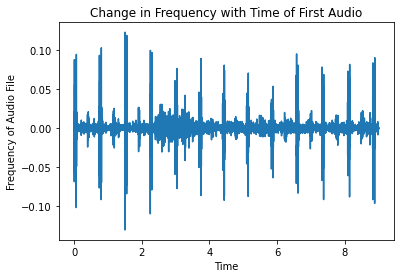

In [162]:
# Create the time range for plotting the frequency
time=np.arange(0,len(audio))/sfreq
# plot the frequency
plt.plot(time, audio)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("first.png", dpi=300)
plt.show()

In [163]:
print(audio.min())

-0.13108155


In [164]:
data_df[['sfreq','min','mean','max']]=""

In [165]:
for i in range(len(audio_files)):
    audio, sfreq =lr.load(audio_files[i])
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'sfreq']=sfreq
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'min']=audio.min()
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'mean']=audio.mean()
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'max']=audio.max()

In [166]:
len(audio_files)

124

## Need to change the label to numeric value so that classification can be done

In [167]:
data_df['class']=""
data_df.loc[data_df.label=='normal', 'class']=0
data_df.loc[data_df.label!='normal','class']=1

In [168]:
data_df.head()

,dataset,fname,label,sfreq,min,mean,max,class
0,a,set_a/artifact__201012172012.wav,artifact,22050,-0.730766,-1.04662e-05,0.712701,1
1,a,set_a/artifact__201105040918.wav,artifact,22050,-0.0173211,-1.10528e-06,0.0158929,1
2,a,set_a/artifact__201105041959.wav,artifact,22050,-0.0204537,4.74498e-07,0.0195355,1
3,a,set_a/artifact__201105051017.wav,artifact,22050,-0.920064,-1.36942e-05,0.762148,1
4,a,set_a/artifact__201105060108.wav,artifact,22050,-0.905326,-2.86369e-05,0.924389,1


## Let's see how a simple machine learning algorithm works on this dataset

In [169]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model=LinearSVC()
#extract the features and label in seperate sheet
X=data_df[['min','mean','max']].values
y=data_df['class'].values.astype(int)
#Split the dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, stratify=y, random_state=111)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
display('The testing accuracy is {}'.format(accuracy_score(y_test, predictions)))
predictions=model.predict(X_train)
display('The training accuracy is {}'.format(accuracy_score(y_train, predictions)))


'The testing accuracy is 0.7368421052631579'

'The training accuracy is 0.7558139534883721'

## This is simple feature engineering for sound waveform. Now lets create an envolpe for the waveform

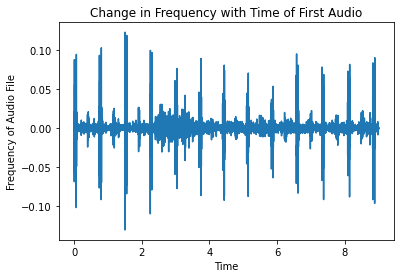

In [170]:
audio, sfreq=lr.load(audio_files[50])
time=np.arange(0,len(audio))/sfreq
plt.plot(time, audio)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("2.png", dpi=300)
plt.show()

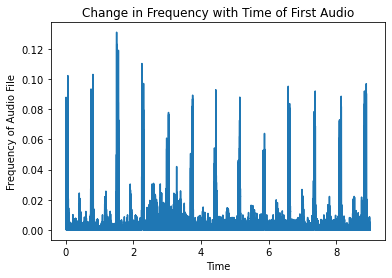

In [171]:
#recitified the -ve values in audio
audio_rect=np.abs(audio)
#plot the graph for rectified
plt.plot(time, audio_rect)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("3.png", dpi=300)
plt.show()

In [172]:
print(type(audio))

<class 'numpy.ndarray'>


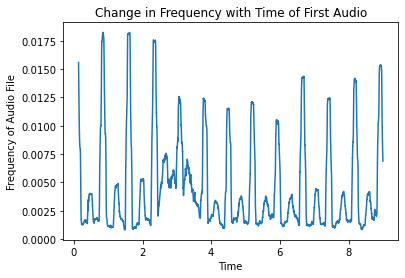

In [173]:
#Now create envolpe using rolling window
audio_env=pd.DataFrame(audio_rect)
audio_env=audio_env.rolling(3000).mean()
audio_env=audio_env.to_numpy()
#plot the graph for smooth audio
plt.plot(time, audio_env)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("4.png", dpi=300)
plt.show()

In [180]:
files=[]
names=[]
for i in range(len(audio_files)):
    audio, sfreq=lr.load(audio_files[i])
    names.append(audio_files[i])
    files.append(audio)
audio_all=pd.DataFrame(files)
audio_all.index=names
audio_all.head()

,0,1,2,3,4,5,6,7,8,9,...,198440,198441,198442,198443,198444,198445,198446,198447,198448,198449
set_a\artifact__201012172012.wav,0.000023,-0.000130,-0.000181,-0.000167,-0.000047,0.000095,0.000099,-0.000018,-1.737173e-04,-0.000190,...,-0.000111,-0.000219,-0.000022,0.000048,0.000012,0.000244,0.000144,-0.000116,-0.000029,0.000029
set_a\artifact__201105040918.wav,-0.000011,0.000001,0.000002,-0.000002,-0.000004,0.000003,-0.000008,0.000007,7.261384e-07,-0.000010,...,-0.000170,-0.000285,-0.000124,0.000101,0.000287,0.000411,0.000418,0.000145,-0.000062,-0.000168
set_a\artifact__201105041959.wav,0.000037,-0.000166,-0.000074,-0.000033,0.000074,0.000153,0.000099,-0.000008,3.541701e-05,0.000035,...,-0.000041,0.000017,0.000081,-0.000151,-0.000108,0.000006,0.000154,0.000076,0.000034,0.000040
set_a\artifact__201105051017.wav,-0.002743,-0.006650,-0.004978,-0.008188,-0.005176,0.001318,0.002499,0.005483,7.478257e-03,0.008449,...,-0.001398,-0.001402,-0.000984,0.001026,-0.000925,-0.005180,-0.008277,-0.007573,-0.004743,-0.002580
set_a\artifact__201105060108.wav,0.000106,0.001500,0.009725,0.016769,0.019624,0.013949,0.011668,0.010955,1.147425e-02,0.011299,...,-0.005734,-0.000116,0.004989,0.011790,0.015782,0.016439,0.014134,0.011297,0.002116,-0.001515


In [181]:
audio_all_rect=audio_all.apply(np.abs)
audio_all_env=audio_all_rect.rolling(3000, axis=1).mean()

In [203]:
temp=audio_all_env.mean(axis=1)

In [204]:
print(temp)

set_a\artifact__201012172012.wav    0.001324
set_a\artifact__201105040918.wav    0.000299
set_a\artifact__201105041959.wav    0.000485
set_a\artifact__201105051017.wav    0.010100
set_a\artifact__201105060108.wav    0.012662
                                      ...   
set_a\normal__201106221450.wav      0.016419
set_a\normal__201108011112.wav      0.028383
set_a\normal__201108011114.wav      0.020292
set_a\normal__201108011115.wav      0.024787
set_a\normal__201108011118.wav      0.038700
Length: 124, dtype: float64


## Add these values of envolpe into the main dataset we have created

In [205]:
data_df[['env_mean','env_std','env_max']]=""
data_df.loc[data_df['fname']==audio_all_env.index, 'env_mean']=temp
#data_df.loc[data_df['fname']==audio_all_env.index, 'env_std']=audio_all_env.std(axis=1)
#data_df.loc[data_df['fname']==audio_all_env.index, 'env_max']=audio_all_env.max(axis=1)
data_df.head()

,dataset,fname,label,sfreq,min,mean,max,class,env_mean,env_std,env_max
0,a,set_a/artifact__201012172012.wav,artifact,22050,-0.730766,-1.04662e-05,0.712701,1,,,
1,a,set_a/artifact__201105040918.wav,artifact,22050,-0.0173211,-1.10528e-06,0.0158929,1,,,
2,a,set_a/artifact__201105041959.wav,artifact,22050,-0.0204537,4.74498e-07,0.0195355,1,,,
3,a,set_a/artifact__201105051017.wav,artifact,22050,-0.920064,-1.36942e-05,0.762148,1,,,
4,a,set_a/artifact__201105060108.wav,artifact,22050,-0.905326,-2.86369e-05,0.924389,1,,,
